Este notebook tem por finalidade aplicar modelos de Machine Learning na seleção de features adequadas para um projeto

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html
https://scikit-learn.org/stable/modules/feature_selection.html

#### Criando regressão

In [ ]:
from sklearn.datasets import make_regression

In [71]:
X, y = make_regression(n_samples = 500, n_features = 10, n_informative = 5, n_targets = 1)

#### Definindo modelo Lasso para a feature selection

In [72]:
from sklearn.linear_model import LassoCV

In [73]:
lasso = LassoCV(cv = 10)
lasso.fit(X, y)

LassoCV(cv=10)

#### Resgatando coeficientes de importância das features

In [74]:
importance = lasso.coef_
print(importance)

[-0.          0.          6.95681912  0.         -0.         92.12868221
 34.87783788 68.40251392 56.82812848 -0.        ]


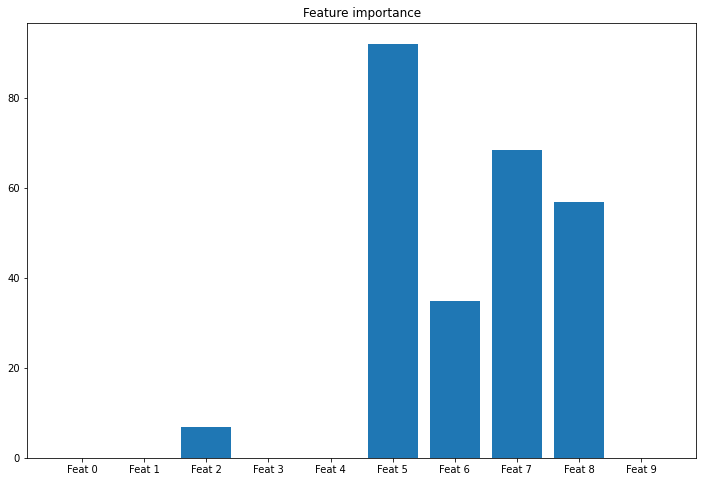

In [75]:
#Demonstrando importância de cada feature

from matplotlib import pyplot as plt
import numpy as np

label = []
for i, l in enumerate (importance):
    label.append("Feat "+str(i))

plt.figure(figsize=(12,8))

plt.bar(height = importance, x = label)

plt.title("Feature importance")
plt.show()

#### Definindo limiar para seleção das features

Serão selecionadas as 3 features mais importantes segundo seus coeficientes

In [27]:
from sklearn.feature_selection import SelectFromModel

In [76]:
# Definindo o limiar acima do coeficiente do quarto colocado

threshold = np.sort(importance)[-6] + 0.01

sfm = SelectFromModel(lasso, threshold = threshold)
sfm.fit(X, y)

#print(feature_names[sfm.get_support()])
print(sfm.get_support())

[False False  True False False  True  True  True  True False]


#### Testando em dados de Boston

In [157]:
from sklearn.datasets import load_boston

X,y = load_boston(return_X_y = True)
labels = load_boston().feature_names

In [158]:
#criando modelo e recebendo os coeficientes

lasso = LassoCV(cv = 10)
lasso.fit(X,y)

importance = np.abs(lasso.coef_) #Valor em módulo
print(importance)

[0.07426626 0.04945448 0.         0.         0.         1.804385
 0.01133345 0.81324404 0.27228399 0.01542465 0.74287183 0.00892587
 0.70365352]


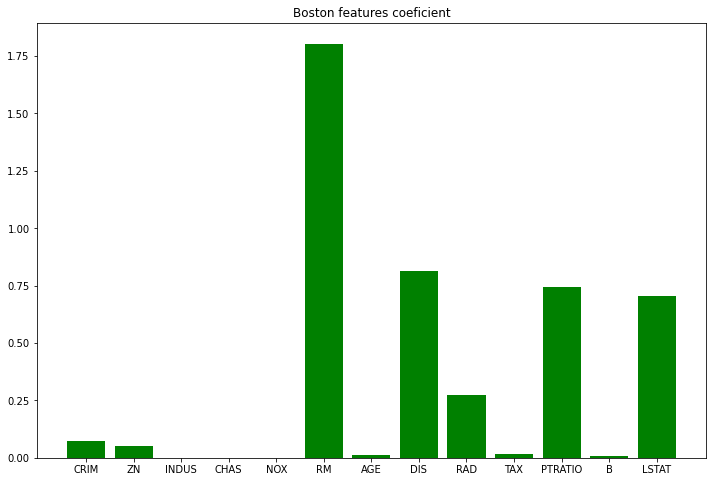

In [159]:
#plotando coeficientes

plt.figure(figsize=(12,8))
plt.title("Boston features coeficient")

plt.bar(height = importance, x = labels, color='green')

plt.show()

In [160]:
#definindo threshold como 0.70 e selecionando features
threshold = 0.70
sfm = SelectFromModel(lasso, threshold = threshold)
sfm.fit(X, y)
result_vector = sfm.get_support()

In [161]:
#Armazenando indices das melhores features
selected_index = [i for i,z in enumerate(result_vector) if z]
        
#Armazenando labels das melhores features
selected_labels = [labels[i] for i in selected_index]

print("Best features: ",selected_labels)
print("Index best features: ", selected_index)

Best features:  ['RM', 'DIS', 'PTRATIO', 'LSTAT']
Index best features:  [5, 7, 10, 12]


In [162]:
#Treinando modelo com todas features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

lasso_def = LassoCV(cv=10)
lasso_def.fit(X_train, y_train)
score_def = lasso_def.score(X_test, y_test)

print(score_def)

0.5952936410793941


In [163]:
#Treinando modelo apenas com as features selecionadas

#dividindo X
X_feat = X[:,selected_index]
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feat, y, random_state = 10)

lasso_feat = LassoCV(cv=10)
lasso_feat.fit(X_train_feat, y_train_feat)
score_feat = lasso_feat.score(X_test_feat, y_test_feat)

print(score_feat)

0.6663203940344121


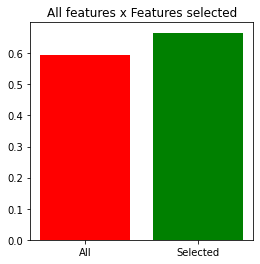

In [164]:
plt.figure(figsize=(4,4))
plt.title("All features x Features selected")

plt.bar(height = [score_def, score_feat], x = ["All", "Selected"], color=['red','green'])

plt.show()

#### Aplicando bases no modelo SVM

In [165]:
from sklearn.svm import SVR

In [166]:
svm_def = SVR()
svm_def.fit(X_train, y_train)
svm_score_def = svm_def.score(X_test, y_test)

svm_feat = SVR()
svm_feat.fit(X_train_feat, y_train_feat)
svm_score_feat = svm_feat.score(X_test_feat, y_test_feat)

print("All features: ",svm_score_def)
print("Selected features: ",svm_score_feat)

All features:  0.01880865797614728
Selected features:  0.563162375984242


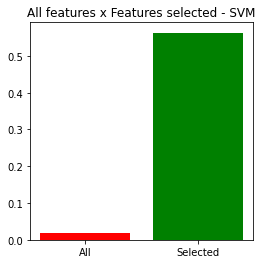

In [167]:
plt.figure(figsize=(4,4))
plt.title("All features x Features selected - SVM")

plt.bar(height = [svm_score_def, svm_score_feat], x = ["All", "Selected"], color=['red','green'])

plt.show()